In [17]:
import cv2, dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils
from math import atan2, degrees

In [6]:
detector =  dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/DL/bear-face-detection/models/bearface_network.dat')
predictor = dlib.shape_predictor('/content/drive/MyDrive/DL/bear-face-detection/models/landmarkDetector.dat')

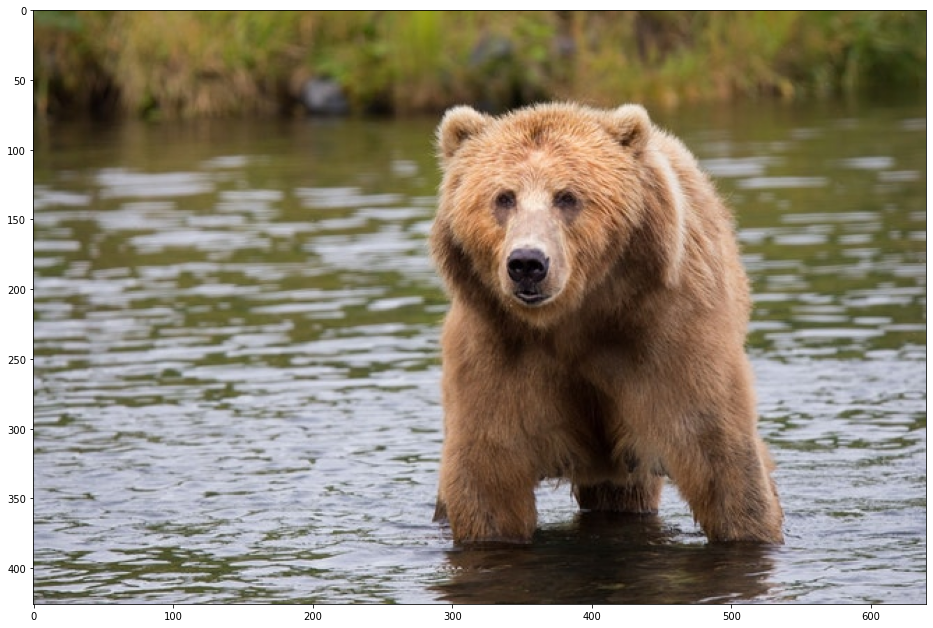

In [8]:
img_path = '/content/drive/MyDrive/DL/bear-face-detection/imgs/01.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
plt.imshow(img)

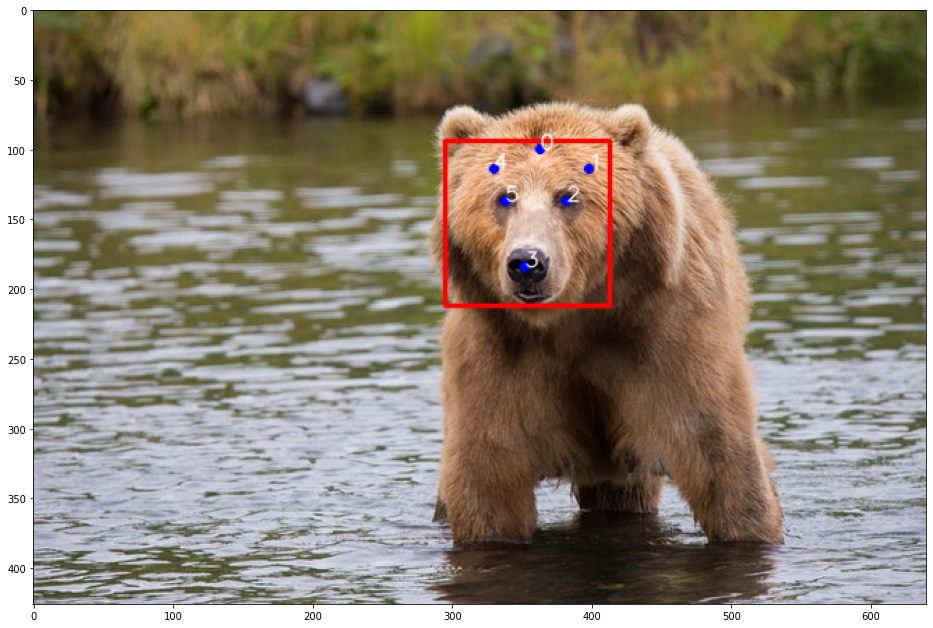

In [16]:
dets = detector(img, upsample_num_times=1)

img_result = img.copy()

for det in dets:
    x1, y1 = det.rect.left(), det.rect.top()
    x2, y2 = det.rect.right(), det.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1,y1), pt2=(x2,y2), color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
    shape = predictor(img_result, det.rect)
    shape = face_utils.shape_to_np(shape)

    for i, p in enumerate(shape):
      cv2.circle(img_result, center=tuple(p), radius=3, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
      cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)
plt.figure(figsize=(16,16))
plt.imshow(img_result)

In [37]:
img = cv2.imread('/content/drive/MyDrive/DL/bear-face-detection/imgs/02.jpg')
img_result = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
glasses = cv2.imread('/content/drive/MyDrive/DL/bear-face-detection/imgs/glasses.png', cv2.IMREAD_UNCHANGED)
glasses = cv2.cvtColor(glasses, cv2.COLOR_RGB2RGBA)

True

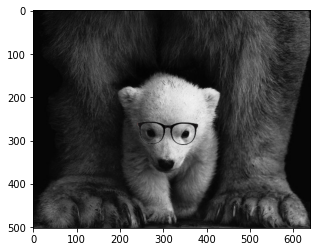

In [38]:
dets = detector(img)

for det in dets:
    x1, y1 = det.rect.left(), det.rect.top()
    x2, y2 = det.rect.right(), det.rect.bottom()

    shape = predictor(img_result, det.rect)
    shape_np = face_utils.shape_to_np(shape)

    glasses_center = np.mean([shape_np[5], shape_np[2]], axis=0).astype(int)
    glasses_size = int(np.linalg.norm(shape_np[5] - shape_np[2]) * 1.8)

    glasses_resized = cv2.resize(glasses.copy(), dsize=(glasses_size, glasses_size))

    def angle_between(p1, p2):
      xDiff = p2[0] - p1[0]
      yDiff = p2[1] - p1[1]
      return degrees(atan2(yDiff, xDiff))

    angle = -angle_between(shape_np[5], shape_np[2])
    M = cv2.getRotationMatrix2D((glasses_resized.shape[1]/2,glasses_resized.shape[0]/2), angle, 1)
    rotated_glasses = cv2.warpAffine(
        glasses_resized.copy(),
        M,
        (glasses_size, glasses_size),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=255
    )

    x_offset, y_offset = glasses_center - np.array([rotated_glasses.shape[1] / 2, rotated_glasses.shape[0] / 2], dtype=int)

    y1, y2 = y_offset, y_offset + glasses_size
    x1, x2 = x_offset, x_offset + glasses_size
    

    alpha_s = rotated_glasses[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    for c in range(0, 3):
      img_result[y1:y2, x1:x2, c] = (alpha_s * rotated_glasses[:, :, c] + alpha_l * img_result[y1:y2, x1:x2, c])

plt.imshow(img_result)
cv2.imwrite('/content/drive/MyDrive/DL/bear-face-detection/imgs/result_bear+glasses.jpg', img_result)